In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy import polyval, polyfit, sqrt, stats, randn
from matplotlib.patches import Rectangle

In [2]:
# constants
c = 3 * 10 **8
e = 1.6 * 10 **-19
ϵ0 = 8.854 * 10 **-12
me = 0.511 / c**2
mp = 938 / c**2
N_A = 6.022 * 10 **23
m_α = 3727.379 / c**2
W_air = 85.7 * 10 **-6
W_He = 41.8 * 10 **-6
W_Ar = 187 * 10 **-6
Z_α = 2
Ekin_α = 5.486
k_b = 1.38 * 10 **-23
k_air = 14.4
k_He = 2
k_Ar = 18
# MeV/J
MeV_J = 1/e * 10**-6

In [99]:
#functions
def gauss(x, a, x0, sigma,b):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))+b;
def g(x,a,b):
    return a*x+b;

In [92]:
#reading acquired data

T=[798];
ΔT=2;
lFilter=[1.34,1.69,1.90,2.12,2.47,4.66];
stepsCal=[]
intensityCal=[]

#day 1
#calibration

for a in range(6):
    input = 'Data/filter'+str(a+1)+'.txt'
    ste=[];
    inte=[];
    for line in open(input):
            line = line.replace("\n","")
            line = line.replace(",",".")
            d = line.split("\t")
            ste.append(float(d[0]))
            inte.append(float(d[1]))
    intensityCal.append(inte); 
    stepsCal.append(ste);

    
#temperature

<h1>day 1</h1>
<br>
<h2>calibration fit</h2>

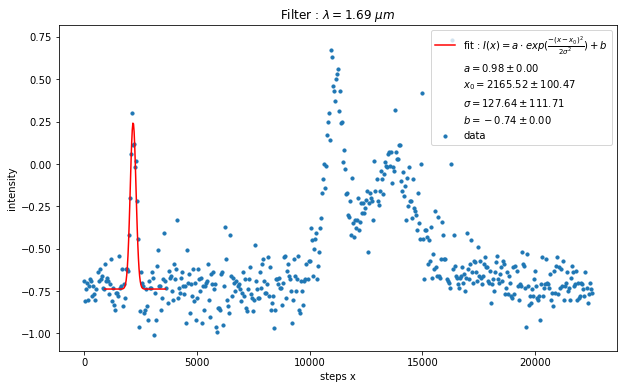

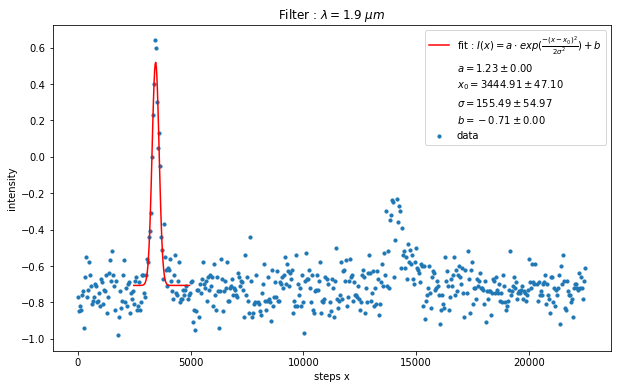

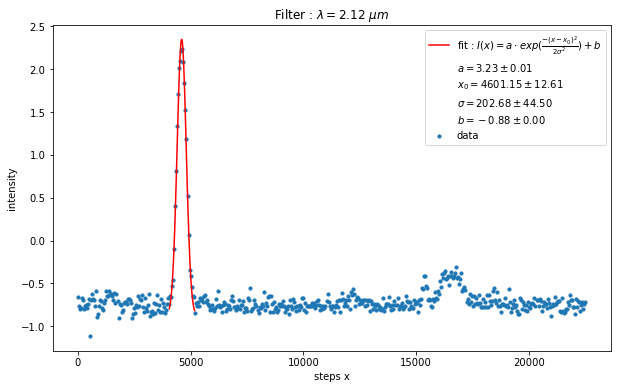

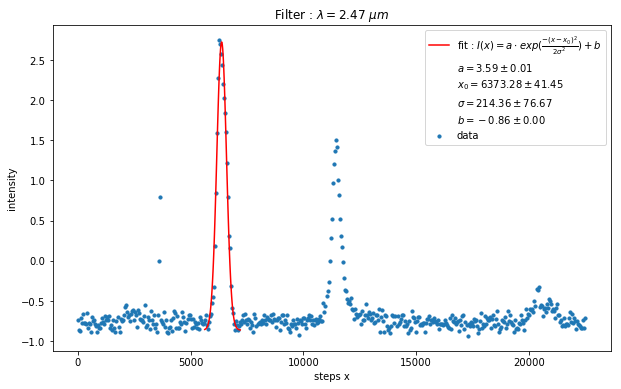

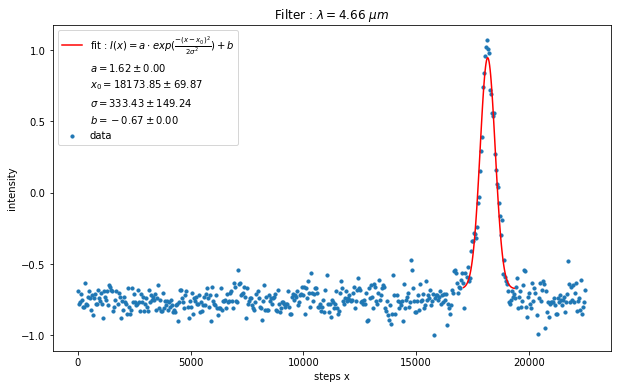

In [204]:
stepsMax=[]
ΔstepsMax=[]

#calibration
s=[x for x in stepsCal]
I=[x for x in intensityCal]

#fit region
reg = [[1,2],[20,80],[55,110],[90,115],[125,160],[380,430]]

#gaussian fits
for i in range(1,6):
    t=np.linspace(s[i][reg[i][0]],s[i][reg[i][1]],100)
    s[i] = s[i][reg[i][0]:reg[i][1]]
    I[i] = I[i][reg[i][0]:reg[i][1]]
    x0Initial = 45*(reg[i][1]+reg[i][0])/2
    popt, pcov = curve_fit(gauss,s[i],I[i],p0=[3,x0Initial,100,-1])
    stepsMax.append(popt[1])
    ΔstepsMax.append(np.diag(pcov)[1])
    #plotting
    fig,ax = plt.subplots(figsize=(10,6))
    ax.scatter(stepsCal[i],intensityCal[i],s=10,label="data")
    ax.plot(t,gauss(t,*popt),c="red", label=r"fit : $I(x)=a\cdot exp(\frac{-(x-x_0)^2}{2\sigma^2})+b$")
    ax.plot(t[0],gauss(t[0],*popt),lw=0,label="$a = %0.2f \pm %0.2f$"%(popt[0],np.diag(pcov)[0]))
    ax.plot(t[0],gauss(t[0],*popt),lw=0,label="$x_0 = %0.2f \pm %0.2f$"%(popt[1],np.diag(pcov)[1]))
    ax.plot(t[0],gauss(t[0],*popt),lw=0,label="$\sigma = %0.2f \pm %0.2f$"%(popt[2],np.diag(pcov)[2]))
    ax.plot(t[0],gauss(t[0],*popt),lw=0,label="$b = %0.2f \pm %0.2f$"%(popt[3],np.diag(pcov)[3]))
    ax.set_xlabel("steps x")
    ax.set_ylabel("intensity")
    ax.set_title("Filter : $\lambda = $"+str(lFilter[i])+" $\mu m$")
    ax.legend(loc="best")

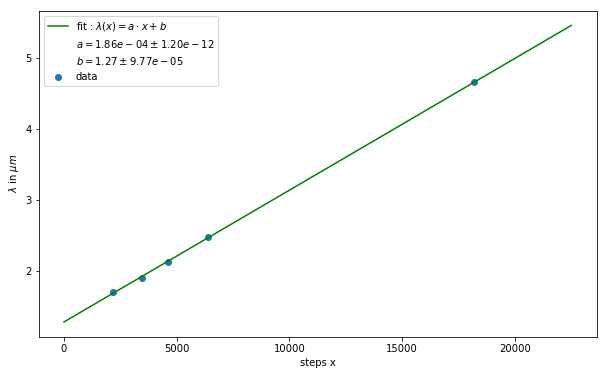

In [207]:
#linear fit of steps and wavelength
popt,pcov = curve_fit(g,stepsMax,lFilter[1:])
a=popt[0]
Δa=np.diag(pcov)[0]
b=popt[1]
Δb=np.diag(pcov)[1]

t=np.linspace(0,22500,100)
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(stepsMax,lFilter[1:],label="data")
ax.plot(t,g(t,a,b),c="g",label="fit : $\lambda(x) = a \cdot x + b$")
ax.set_xlabel("steps x")
ax.set_ylabel("$\lambda$ in $\mu m$")
ax.plot(t[0],g(t[0],*popt),lw=0,label="$a = %0.2e \pm %0.2e$"%(popt[0],np.diag(pcov)[0]))
ax.plot(t[0],g(t[0],*popt),lw=0,label="$b= %0.2f \pm %0.2e$"%(popt[1],np.diag(pcov)[1]))
ax.legend(loc="best")

In [179]:
#calculate the wavelength for a given step
def wl(step):
    return a*step+b;
def Δwl(step):
    return np.sqrt((Δa*step)**2+(Δb)**2)